<a href="https://colab.research.google.com/github/sakshisinghal936/cats_vs_dogs_classification/blob/main/cats_vs_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:09<00:00, 219MB/s]
100% 1.06G/1.06G [00:09<00:00, 120MB/s]


In [ ]:
import zipfile

zip_ref =  zipfile.ZipFile("/content/dogs-vs-cats.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [ ]:
#generators(work in batches instead of complete dataset)
train_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/train",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256,256)
    )

validation_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/test",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256,256)
    )

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), padding = "valid", activation = "relu", input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = "valid"))

model.add(Conv2D(64, kernel_size = (3,3), padding = "valid", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = "valid"))

model.add(Conv2D(128, kernel_size = (3,3), padding = "valid", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = "valid"))

model.add(Flatten())

model.add(Dense(128, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
history = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 77ms/step - accuracy: 0.6057 - loss: 0.6793 - val_accuracy: 0.7484 - val_loss: 0.5074
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.7564 - loss: 0.4956 - val_accuracy: 0.7868 - val_loss: 0.4692
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.8203 - loss: 0.3981 - val_accuracy: 0.7914 - val_loss: 0.4838
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.8791 - loss: 0.2780 - val_accuracy: 0.8010 - val_loss: 0.6403
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 94s 95ms/step - accuracy: 0.9350 - loss: 0.1647 - val_accuracy: 0.7930 - val_loss: 0.8453
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 84ms/step - accuracy: 0.9676 - loss: 0.0914 - val_accuracy: 0.7704 - val_loss: 1.1809
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.9770 - loss: 0.0651 - val_accuracy: 0.7796 - val_loss: 1.2022
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 77ms/step - accuracy: 0.9815 - loss: 0.0582 - 

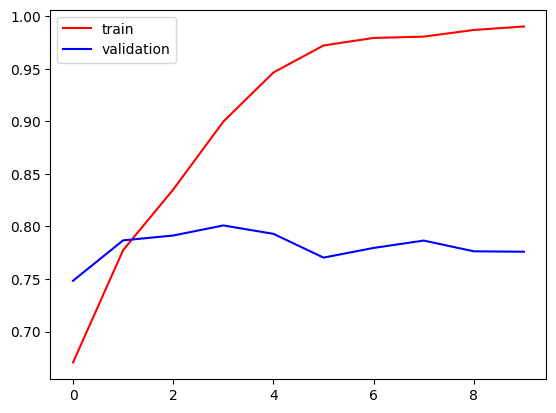

In [ ]:
# prompt: plot history val_accuracy and accuracy

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


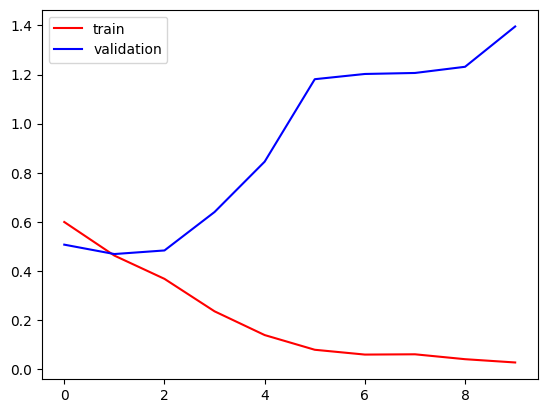

In [ ]:
# prompt: plot history val_loss and loss

import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()


In [ ]:
# create CNN model with dropout and batch normalisation

model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), padding = "valid", activation = "relu", input_shape = (256,256,3)))
BatchNormalization()
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = "valid"))

model.add(Conv2D(64, kernel_size = (3,3), padding = "valid", activation = "relu"))
BatchNormalization()
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = "valid"))

model.add(Conv2D(128, kernel_size = (3,3), padding = "valid", activation = "relu"))
BatchNormalization()
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = "valid"))

model.add(Flatten())

model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation = "sigmoid"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
history = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 78ms/step - accuracy: 0.5621 - loss: 0.6968 - val_accuracy: 0.7180 - val_loss: 0.5404
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 76ms/step - accuracy: 0.7308 - loss: 0.5375 - val_accuracy: 0.7802 - val_loss: 0.4752
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - accuracy: 0.7992 - loss: 0.4345 - val_accuracy: 0.7742 - val_loss: 0.5470
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 79ms/step - accuracy: 0.8518 - loss: 0.3348 - val_accuracy: 0.7974 - val_loss: 0.5546
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 72ms/step - accuracy: 0.9191 - loss: 0.1994 - val_accuracy: 0.7776 - val_loss: 0.7891
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - accuracy: 0.9553 - loss: 0.1159 - val_accuracy: 0.7806 - val_loss: 0.8677
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.9721 - loss: 0.0825 - val_accuracy: 0.7872 - val_loss: 1.2084
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.9774 - loss: 0.0670 - 

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()
